In [1]:
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# Reflect the existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session
session = Session(engine)

C:\Users\me\AppData\Local\Temp\ipykernel_7092\3581846764.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [3]:
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


# Exploratory Precipitation Analysis

In [4]:
# Find the most recent date in the dataset
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"Most recent date: {most_recent}")
#hihi


Most recent date: 2017-08-23


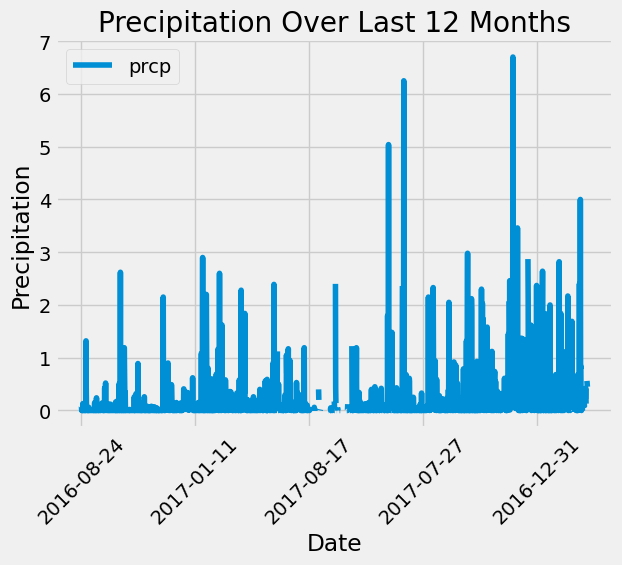

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [5]:
# Calculate the date 12 months ago from the most recent date
most_recent_date = dt.datetime.strptime(most_recent, "%Y-%m-%d")
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query for the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Load the query results into a DataFrame
precip_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])


# Plot the results
precip_df.plot(x='date', y='prcp', rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Last 12 Months')
plt.show()

# Print summary statistics
print(precip_df.describe())


# Exploratory Station Analysis

In [6]:
# Query to calculate the total number of stations
total_stations = session.query(Station).count()
print(f"Total number of stations: {total_stations}")


Total number of stations: 9


In [7]:
# Query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Print the most active stations
print(active_stations)

# Most active station
most_active_station = active_stations[0][0]
print(f"Most active station: {most_active_station}")


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
Most active station: USC00519281


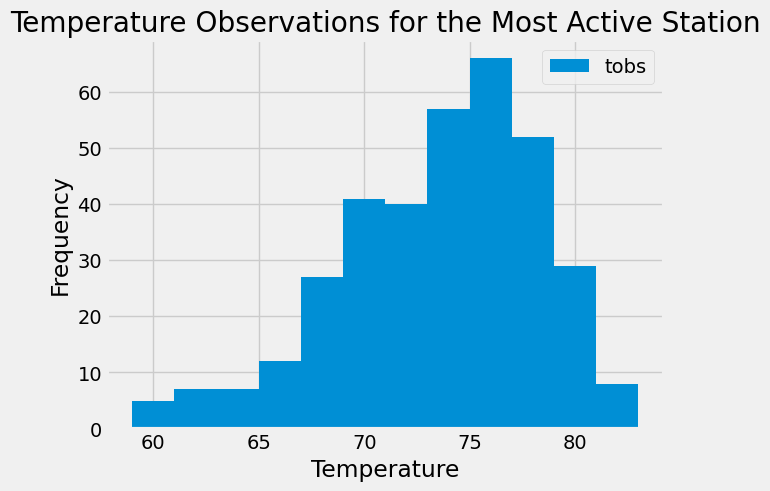

             tobs
count  351.000000
mean    73.096866
std      4.735491
min     59.000000
25%     70.000000
50%     74.000000
75%     77.000000
max     83.000000


In [8]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Query for temperature data for the most active station
temperature_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year_ago).all()

# Load the temperature data into a DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['tobs'])

# Plot the results as a histogram
temperature_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Most Active Station')
plt.show()

# Print summary statistics for the temperature data
print(temperature_df.describe())


# Close Session

In [9]:
# Close Session
session.close()